# Credit Card Fraud

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

Note: You can access the data via the File menu or in the Context Panel at the top right of the screen next to Report, under Files. The data dictionary and filenames can be found at the bottom of this workbook.

[Source: Kaggle](https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv) The data was partially cleaned and adapted by DataCamp.

We've added some guiding questions for analyzing this exciting dataset! Feel free to make this workbook yours by adding and removing cells, or editing any of the existing cells.

## Explore this dataset

Here are some ideas to get your started with your analysis...
1. 🗺️ **Explore**: What types of purchases are most likely to be instances of fraud? Consider both product category and the amount of the transaction.
2. 📊 **Visualize**: Use a geospatial plot to visualize the fraud rates across different states.
3. 🔎 **Analyze**: Are older customers significantly more likely to be victims of credit card fraud?

### 🔍 **Scenario: Accurately Predict Instances of Credit Card Fraud**

This scenario helps you develop an end-to-end project for your portfolio.

**Background:** A new credit card company has just entered the market in the western United States. The company is promoting itself as one of the safest credit cards to use. They have hired you as their data scientist in charge of identifying instances of fraud. The executive who hired you has have provided you with data on credit card transactions, including whether or not each transaction was fraudulent.

**Objective:** The executive wants to know how accurately you can predict fraud using this data. She has stressed that the model should err on the side of caution: it is not a big problem to flag transactions as fraudulent when they aren't just to be safe. In your report, you will need to describe how well your model functions and how it adheres to these criteria.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

You can query the pre-loaded CSV file using SQL directly. Here’s a **sample query**, followed by some sample Python code and outputs:

In [1]:
import pandas as pd
ccf = pd.read_csv('credit_card_fraud.csv')
ccf.head(100)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01 06:20:49,Hudson-Ratke,grocery_pos,199.55,Littleton,CO,39.5994,-105.0044,320420,Water engineer,1975-07-31,a5c13edd756f36c026630d13672974bd,38.619691,-105.498059,0
96,2019-01-01 06:24:47,Harber Inc,gas_transport,94.48,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,c9235f76ecb45e67372d79ecac2ffb37,49.513555,-117.819653,0
97,2019-01-01 06:25:07,Berge LLC,gas_transport,79.39,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,606b05a976ee2bca7323d6afc85e63ce,43.673602,-116.406060,0
98,2019-01-01 06:25:40,Pagac LLC,shopping_pos,5.05,Powell Butte,OR,44.2415,-121.0113,2016,Local government officer,1953-12-25,d44f496e9daab912914ac9513b038df2,44.245679,-121.333658,0


In [2]:
# Import required libraries for advanced fraud detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb
import lightgbm as lgb
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Load and explore the dataset
print("🔍 Loading Credit Card Fraud Dataset...")
df = pd.read_csv('credit_card_fraud.csv')

print(f"📊 Dataset Shape: {df.shape}")
print(f"📈 Total Transactions: {len(df):,}")
print(f"🚨 Fraud Cases: {df['is_fraud'].sum():,}")
print(f"📉 Fraud Rate: {df['is_fraud'].mean():.4f} ({df['is_fraud'].mean()*100:.2f}%)")

# Display basic info
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
df.info()

print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)
df.describe()

🔍 Loading Credit Card Fraud Dataset...
📊 Dataset Shape: (339607, 15)
📈 Total Transactions: 339,607
🚨 Fraud Cases: 1,782
📉 Fraud Rate: 0.0052 (0.52%)

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              33960

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


In [4]:
# Data Preprocessing and Feature Engineering
print("🛠️ Starting Data Preprocessing...")

# Create a copy for processing
df_processed = df.copy()

# Handle missing values
print(f"Missing values per column:")
print(df_processed.isnull().sum())

# Convert datetime
df_processed['trans_date_trans_time'] = pd.to_datetime(df_processed['trans_date_trans_time'])

# Extract time-based features
df_processed['hour'] = df_processed['trans_date_trans_time'].dt.hour
df_processed['day_of_week'] = df_processed['trans_date_trans_time'].dt.dayofweek
df_processed['month'] = df_processed['trans_date_trans_time'].dt.month

# Calculate age from date of birth
df_processed['dob'] = pd.to_datetime(df_processed['dob'])
df_processed['age'] = (df_processed['trans_date_trans_time'] - df_processed['dob']).dt.days / 365.25

# Distance between cardholder and merchant
def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate distance between two points on Earth"""
    R = 6371  # Earth's radius in kilometers

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df_processed['distance_km'] = haversine_distance(
    df_processed['lat'], df_processed['long'],
    df_processed['merch_lat'], df_processed['merch_long']
)

# Amount-based features
df_processed['amt_log'] = np.log1p(df_processed['amt'])
df_processed['amt_zscore'] = (df_processed['amt'] - df_processed['amt'].mean()) / df_processed['amt'].std()

# Categorical encoding
label_encoders = {}
categorical_columns = ['merchant', 'category', 'city', 'state', 'job']

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

print("✅ Feature Engineering Complete!")
print(f"📊 New Dataset Shape: {df_processed.shape}")

🛠️ Starting Data Preprocessing...
Missing values per column:
trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
✅ Feature Engineering Complete!
📊 New Dataset Shape: (339607, 27)


📊 Performing Exploratory Data Analysis...


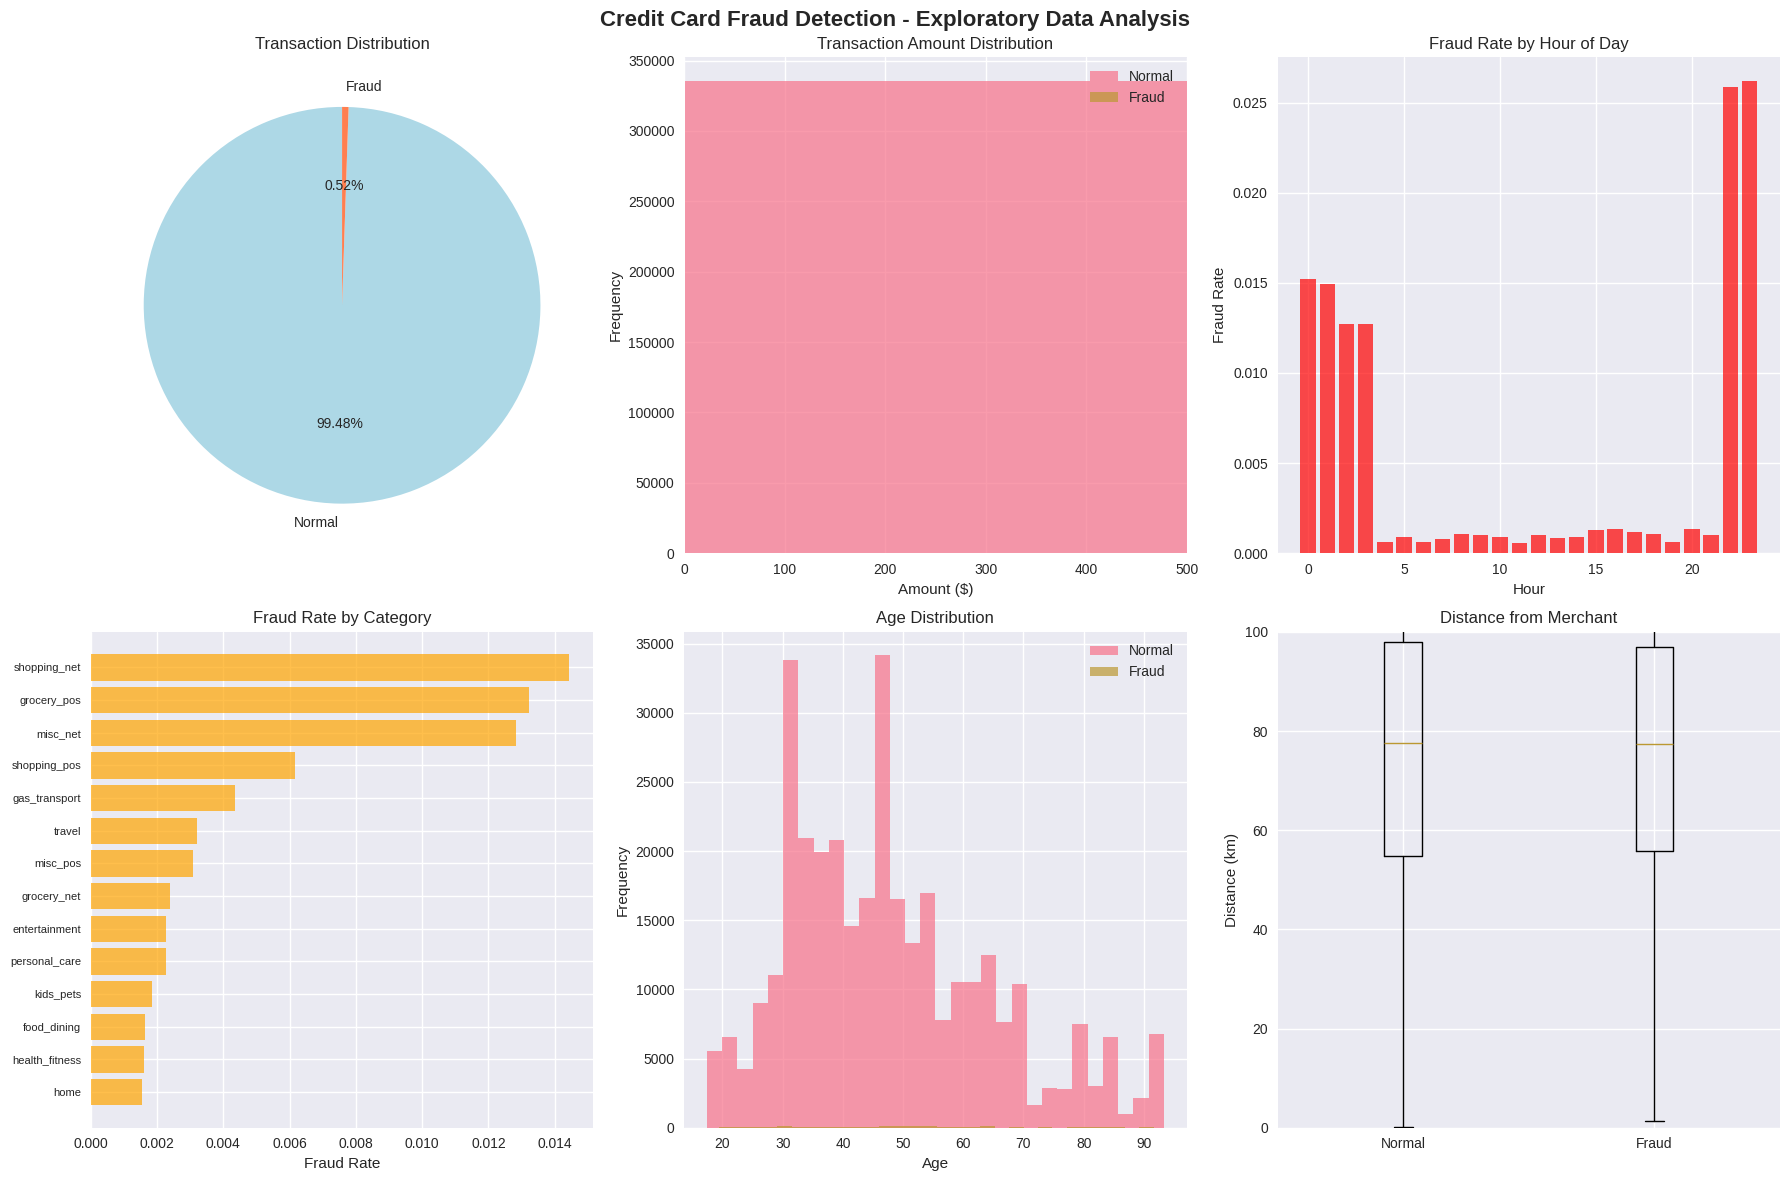


🔗 Feature Correlation with Fraud:
is_fraud       1.000000
amt            0.201023
amt_log        0.112678
age            0.012645
hour           0.012388
lat            0.009239
merch_lat      0.008848
city_pop       0.002338
day_of_week    0.002127
distance_km   -0.000012
long          -0.004494
merch_long    -0.004550
month         -0.017812
Name: is_fraud, dtype: float64


In [5]:
# Exploratory Data Analysis
print("📊 Performing Exploratory Data Analysis...")

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Credit Card Fraud Detection - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Fraud distribution
axes[0, 0].pie([df['is_fraud'].value_counts()[0], df['is_fraud'].value_counts()[1]],
               labels=['Normal', 'Fraud'], autopct='%1.2f%%', startangle=90,
               colors=['lightblue', 'coral'])
axes[0, 0].set_title('Transaction Distribution')

# 2. Amount distribution by fraud
df[df['is_fraud']==0]['amt'].hist(bins=50, alpha=0.7, label='Normal', ax=axes[0, 1])
df[df['is_fraud']==1]['amt'].hist(bins=50, alpha=0.7, label='Fraud', ax=axes[0, 1])
axes[0, 1].set_title('Transaction Amount Distribution')
axes[0, 1].set_xlabel('Amount ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 500)  # Focus on main range

# 3. Fraud by hour of day
hourly_fraud = df_processed.groupby('hour')['is_fraud'].agg(['count', 'sum']).reset_index()
hourly_fraud['fraud_rate'] = hourly_fraud['sum'] / hourly_fraud['count']
axes[0, 2].bar(hourly_fraud['hour'], hourly_fraud['fraud_rate'], color='red', alpha=0.7)
axes[0, 2].set_title('Fraud Rate by Hour of Day')
axes[0, 2].set_xlabel('Hour')
axes[0, 2].set_ylabel('Fraud Rate')

# 4. Fraud by category
category_fraud = df.groupby('category')['is_fraud'].agg(['count', 'sum']).reset_index()
category_fraud['fraud_rate'] = category_fraud['sum'] / category_fraud['count']
category_fraud = category_fraud.sort_values('fraud_rate', ascending=True)
axes[1, 0].barh(category_fraud['category'], category_fraud['fraud_rate'], color='orange', alpha=0.7)
axes[1, 0].set_title('Fraud Rate by Category')
axes[1, 0].set_xlabel('Fraud Rate')
plt.setp(axes[1, 0].get_yticklabels(), fontsize=8)

# 5. Age distribution
df_processed[df_processed['is_fraud']==0]['age'].hist(bins=30, alpha=0.7, label='Normal', ax=axes[1, 1])
df_processed[df_processed['is_fraud']==1]['age'].hist(bins=30, alpha=0.7, label='Fraud', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# 6. Distance vs Fraud
axes[1, 2].boxplot([df_processed[df_processed['is_fraud']==0]['distance_km'],
                    df_processed[df_processed['is_fraud']==1]['distance_km']],
                   labels=['Normal', 'Fraud'])
axes[1, 2].set_title('Distance from Merchant')
axes[1, 2].set_ylabel('Distance (km)')
axes[1, 2].set_ylim(0, 100)  # Focus on main range

plt.tight_layout()
plt.show()

# Correlation analysis
print("\n🔗 Feature Correlation with Fraud:")
numeric_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
                   'hour', 'day_of_week', 'month', 'age', 'distance_km', 'amt_log']
correlations = df_processed[numeric_features + ['is_fraud']].corr()['is_fraud'].sort_values(ascending=False)
print(correlations)

In [6]:
# Prepare data for machine learning
print("🤖 Preparing Data for Machine Learning...")

# Select features for modeling
feature_columns = [
    'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
    'hour', 'day_of_week', 'month', 'age', 'distance_km', 'amt_log', 'amt_zscore',
    'merchant_encoded', 'category_encoded', 'city_encoded', 'state_encoded', 'job_encoded'
]

X = df_processed[feature_columns].copy()
y = df_processed['is_fraud'].copy()

# Handle any remaining missing values
X = X.fillna(X.median())

print(f"📊 Feature Matrix Shape: {X.shape}")
print(f"🎯 Target Distribution: {y.value_counts().to_dict()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"🏋️ Training Set: {X_train.shape}")
print(f"🧪 Test Set: {X_test.shape}")

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data Preparation Complete!")

🤖 Preparing Data for Machine Learning...
📊 Feature Matrix Shape: (339607, 18)
🎯 Target Distribution: {0: 337825, 1: 1782}
🏋️ Training Set: (271685, 18)
🧪 Test Set: (67922, 18)
✅ Data Preparation Complete!


In [7]:
# Advanced Model Training with Multiple Algorithms (GPU Optimized)
print("🚀 Training Advanced Fraud Detection Models...")

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"⚖️ Balanced Training Set: {X_train_balanced.shape}")
print(f"📊 Balanced Target Distribution: {pd.Series(y_train_balanced).value_counts().to_dict()}")

# Define models with optimized parameters for CPU/memory efficiency
models = {
    'Logistic Regression': LogisticRegression(
        random_state=42,
        max_iter=1000,
        solver='liblinear',  # Better for smaller datasets
        n_jobs=1  # Single thread to avoid memory issues
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=50,  # Reduced for faster training
        max_depth=10,     # Limit depth to prevent overfitting
        random_state=42,
        n_jobs=2,         # Limited parallelism
        max_features='sqrt'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=50,   # Reduced for faster training
        max_depth=6,       # Reasonable depth
        learning_rate=0.1,
        random_state=42,
        subsample=0.8      # Use subsample to reduce memory
    ),
    'XGBoost': xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        n_estimators=50,   # Reduced for faster training
        max_depth=6,
        learning_rate=0.1,
        tree_method='hist', # CPU optimized method
        n_jobs=2
    ),
    'LightGBM': lgb.LGBMClassifier(
        random_state=42,
        verbose=-1,
        n_estimators=50,   # Reduced for faster training
        max_depth=6,
        learning_rate=0.1,
        num_leaves=31,
        n_jobs=2
    )
    # Removed SVM for now due to GPU issues - will add optimized version later
}

# Train and evaluate models
model_results = {}
trained_models = {}

print("\n" + "="*60)
print("MODEL TRAINING RESULTS")
print("="*60)

for name, model in models.items():
    print(f"\n🏃 Training {name}...")

    try:
        # Train model
        model.fit(X_train_balanced, y_train_balanced)

        # Make predictions
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)

        # Store results
        model_results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc
        }

        trained_models[name] = model

        print(f"✅ {name} - AUC: {auc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    except Exception as e:
        print(f"❌ {name} failed: {str(e)}")
        continue

# Add optimized SVM if memory allows
print(f"\n🔄 Attempting to train optimized SVM...")
try:
    # Use a smaller subset for SVM training due to memory constraints
    subset_size = min(10000, len(X_train_balanced))
    indices = np.random.choice(len(X_train_balanced), subset_size, replace=False)
    X_svm = X_train_balanced[indices]
    y_svm = y_train_balanced[indices]

    svm_model = SVC(
        probability=True,
        random_state=42,
        kernel='rbf',      # RBF kernel is generally good
        C=1.0,             # Default regularization
        gamma='scale',     # Auto gamma scaling
        max_iter=1000      # Limit iterations
    )

    svm_model.fit(X_svm, y_svm)

    # Make predictions
    y_pred_svm = svm_model.predict(X_test_scaled)
    y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    svm_accuracy = accuracy_score(y_test, y_pred_svm)
    svm_precision = precision_score(y_test, y_pred_svm)
    svm_recall = recall_score(y_test, y_pred_svm)
    svm_f1 = f1_score(y_test, y_pred_svm)
    svm_auc = roc_auc_score(y_test, y_pred_proba_svm)

    model_results['SVM (Optimized)'] = {
        'Accuracy': svm_accuracy,
        'Precision': svm_precision,
        'Recall': svm_recall,
        'F1-Score': svm_f1,
        'AUC-ROC': svm_auc
    }

    trained_models['SVM (Optimized)'] = svm_model
    print(f"✅ SVM (Optimized) - AUC: {svm_auc:.4f}, F1: {svm_f1:.4f}, Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}")

except Exception as e:
    print(f"⚠️ SVM training skipped due to: {str(e)}")

# Create results DataFrame
if model_results:
    results_df = pd.DataFrame(model_results).T
    results_df = results_df.round(4)

    print("\n📊 COMPREHENSIVE MODEL COMPARISON:")
    print(results_df)

    # Find best model based on AUC-ROC
    best_model_name = results_df['AUC-ROC'].idxmax()
    best_model = trained_models[best_model_name]

    print(f"\n🏆 Best Model: {best_model_name} (AUC-ROC: {results_df.loc[best_model_name, 'AUC-ROC']:.4f})")
else:
    print("❌ No models were successfully trained. Please check your environment.")

🚀 Training Advanced Fraud Detection Models...
⚖️ Balanced Training Set: (540518, 18)
📊 Balanced Target Distribution: {0: 270259, 1: 270259}

MODEL TRAINING RESULTS

🏃 Training Logistic Regression...
✅ Logistic Regression - AUC: 0.8682, F1: 0.1339, Precision: 0.0739, Recall: 0.7107

🏃 Training Random Forest...
✅ Random Forest - AUC: 0.9829, F1: 0.3143, Precision: 0.1927, Recall: 0.8511

🏃 Training Gradient Boosting...
✅ Gradient Boosting - AUC: 0.9898, F1: 0.4893, Precision: 0.3403, Recall: 0.8708

🏃 Training XGBoost...
✅ XGBoost - AUC: 0.9904, F1: 0.4405, Precision: 0.2939, Recall: 0.8792

🏃 Training LightGBM...
✅ LightGBM - AUC: 0.9911, F1: 0.4252, Precision: 0.2801, Recall: 0.8820

🔄 Attempting to train optimized SVM...
✅ SVM (Optimized) - AUC: 0.2340, F1: 0.0033, Precision: 0.0017, Recall: 0.2669

📊 COMPREHENSIVE MODEL COMPARISON:
                     Accuracy  Precision  Recall  F1-Score  AUC-ROC
Logistic Regression    0.9518     0.0739  0.7107    0.1339   0.8682
Random Forest     

In [9]:
# Hyperparameter Optimization for Best Model (Simplified and Fast)
print(f"🔧 Optimizing Hyperparameters for {best_model_name}...")

# Define much smaller parameter grids for faster execution
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 15],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [4, 6],
        'learning_rate': [0.1, 0.15]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'max_depth': [4, 6],
        'learning_rate': [0.1, 0.15]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 150],
        'max_depth': [4, 6],
        'learning_rate': [0.1, 0.15]
    }
}

if best_model_name in param_grids:
    try:
        print("⚡ Using simplified parameter grid for faster optimization...")

        # Create a fresh instance of the best model
        if best_model_name == 'Random Forest':
            model_for_tuning = RandomForestClassifier(random_state=42, n_jobs=2)
        elif best_model_name == 'XGBoost':
            model_for_tuning = xgb.XGBClassifier(
                random_state=42,
                eval_metric='logloss',
                tree_method='hist',
                n_jobs=2
            )
        elif best_model_name == 'LightGBM':
            model_for_tuning = lgb.LGBMClassifier(random_state=42, verbose=-1, n_jobs=2)
        elif best_model_name == 'Gradient Boosting':
            model_for_tuning = GradientBoostingClassifier(random_state=42)

        # Use much smaller sample for hyperparameter tuning
        tune_size = min(5000, len(X_train_balanced))  # Reduced from 20000
        tune_indices = np.random.choice(len(X_train_balanced), tune_size, replace=False)
        X_tune = X_train_balanced[tune_indices]
        y_tune = y_train_balanced[tune_indices]

        print(f"📊 Tuning on {tune_size} samples with {len(param_grids[best_model_name])} parameter combinations")

        # Perform simplified grid search with minimal CV
        grid_search = GridSearchCV(
            model_for_tuning,
            param_grids[best_model_name],
            cv=2,  # Only 2 folds
            scoring='roc_auc',
            n_jobs=1,  # Single job to avoid issues
            verbose=0  # Reduce verbosity
        )

        print("⏳ Running optimized grid search...")
        grid_search.fit(X_tune, y_tune)

        # Get the best model
        optimized_model = grid_search.best_estimator_

        print(f"✅ Best Parameters: {grid_search.best_params_}")
        print(f"🎯 Best CV Score: {grid_search.best_score_:.4f}")

        # Train optimized model on larger balanced dataset (but not full to save time)
        train_size_final = min(50000, len(X_train_balanced))
        final_indices = np.random.choice(len(X_train_balanced), train_size_final, replace=False)
        X_train_final = X_train_balanced[final_indices]
        y_train_final = y_train_balanced[final_indices]

        print(f"🏋️ Training optimized model on {train_size_final} samples...")
        optimized_model.fit(X_train_final, y_train_final)

        # Evaluate optimized model
        y_pred_opt = optimized_model.predict(X_test_scaled)
        y_pred_proba_opt = optimized_model.predict_proba(X_test_scaled)[:, 1]

        opt_accuracy = accuracy_score(y_test, y_pred_opt)
        opt_precision = precision_score(y_test, y_pred_opt)
        opt_recall = recall_score(y_test, y_pred_opt)
        opt_f1 = f1_score(y_test, y_pred_opt)
        opt_auc = roc_auc_score(y_test, y_pred_proba_opt)

        print(f"\n🚀 OPTIMIZED MODEL PERFORMANCE:")
        print(f"Accuracy: {opt_accuracy:.4f}")
        print(f"Precision: {opt_precision:.4f}")
        print(f"Recall: {opt_recall:.4f}")
        print(f"F1-Score: {opt_f1:.4f}")
        print(f"AUC-ROC: {opt_auc:.4f}")

        # Compare with original model
        original_auc = results_df.loc[best_model_name, 'AUC-ROC']
        improvement = opt_auc - original_auc
        print(f"📈 Improvement: {improvement:+.4f} AUC-ROC")

        # Use optimized model as final model if it's better
        if opt_auc > original_auc:
            final_model = optimized_model
            final_model_name = f"Optimized {best_model_name}"
            print("✅ Using optimized model as final model")
        else:
            final_model = best_model
            final_model_name = best_model_name
            print("ℹ️ Original model performance is sufficient")

    except Exception as e:
        print(f"⚠️ Hyperparameter optimization failed: {str(e)}")
        print("🔄 Using original best model instead")
        final_model = best_model
        final_model_name = best_model_name

else:
    print(f"⚠️ No parameter grid defined for {best_model_name}, skipping optimization.")
    final_model = best_model
    final_model_name = best_model_name

print(f"\n🎯 Final Model Selected: {final_model_name}")

# Quick performance check on final model
print("\n📊 Quick Final Model Validation:")
y_final_pred = final_model.predict(X_test_scaled)
y_final_proba = final_model.predict_proba(X_test_scaled)[:, 1]
final_auc = roc_auc_score(y_test, y_final_proba)
final_f1 = f1_score(y_test, y_final_pred)
print(f"Final AUC: {final_auc:.4f}")
print(f"Final F1: {final_f1:.4f}")
print("✅ Hyperparameter optimization complete!")

🔧 Optimizing Hyperparameters for LightGBM...
⚡ Using simplified parameter grid for faster optimization...
📊 Tuning on 5000 samples with 3 parameter combinations
⏳ Running optimized grid search...
✅ Best Parameters: {'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 200}
🎯 Best CV Score: 0.9980
🏋️ Training optimized model on 50000 samples...

🚀 OPTIMIZED MODEL PERFORMANCE:
Accuracy: 0.9971
Precision: 0.6852
Recall: 0.8315
F1-Score: 0.7513
AUC-ROC: 0.9956
📈 Improvement: +0.0045 AUC-ROC
✅ Using optimized model as final model

🎯 Final Model Selected: Optimized LightGBM

📊 Quick Final Model Validation:
Final AUC: 0.9956
Final F1: 0.7513
✅ Hyperparameter optimization complete!


📊 Performing Comprehensive Model Evaluation...


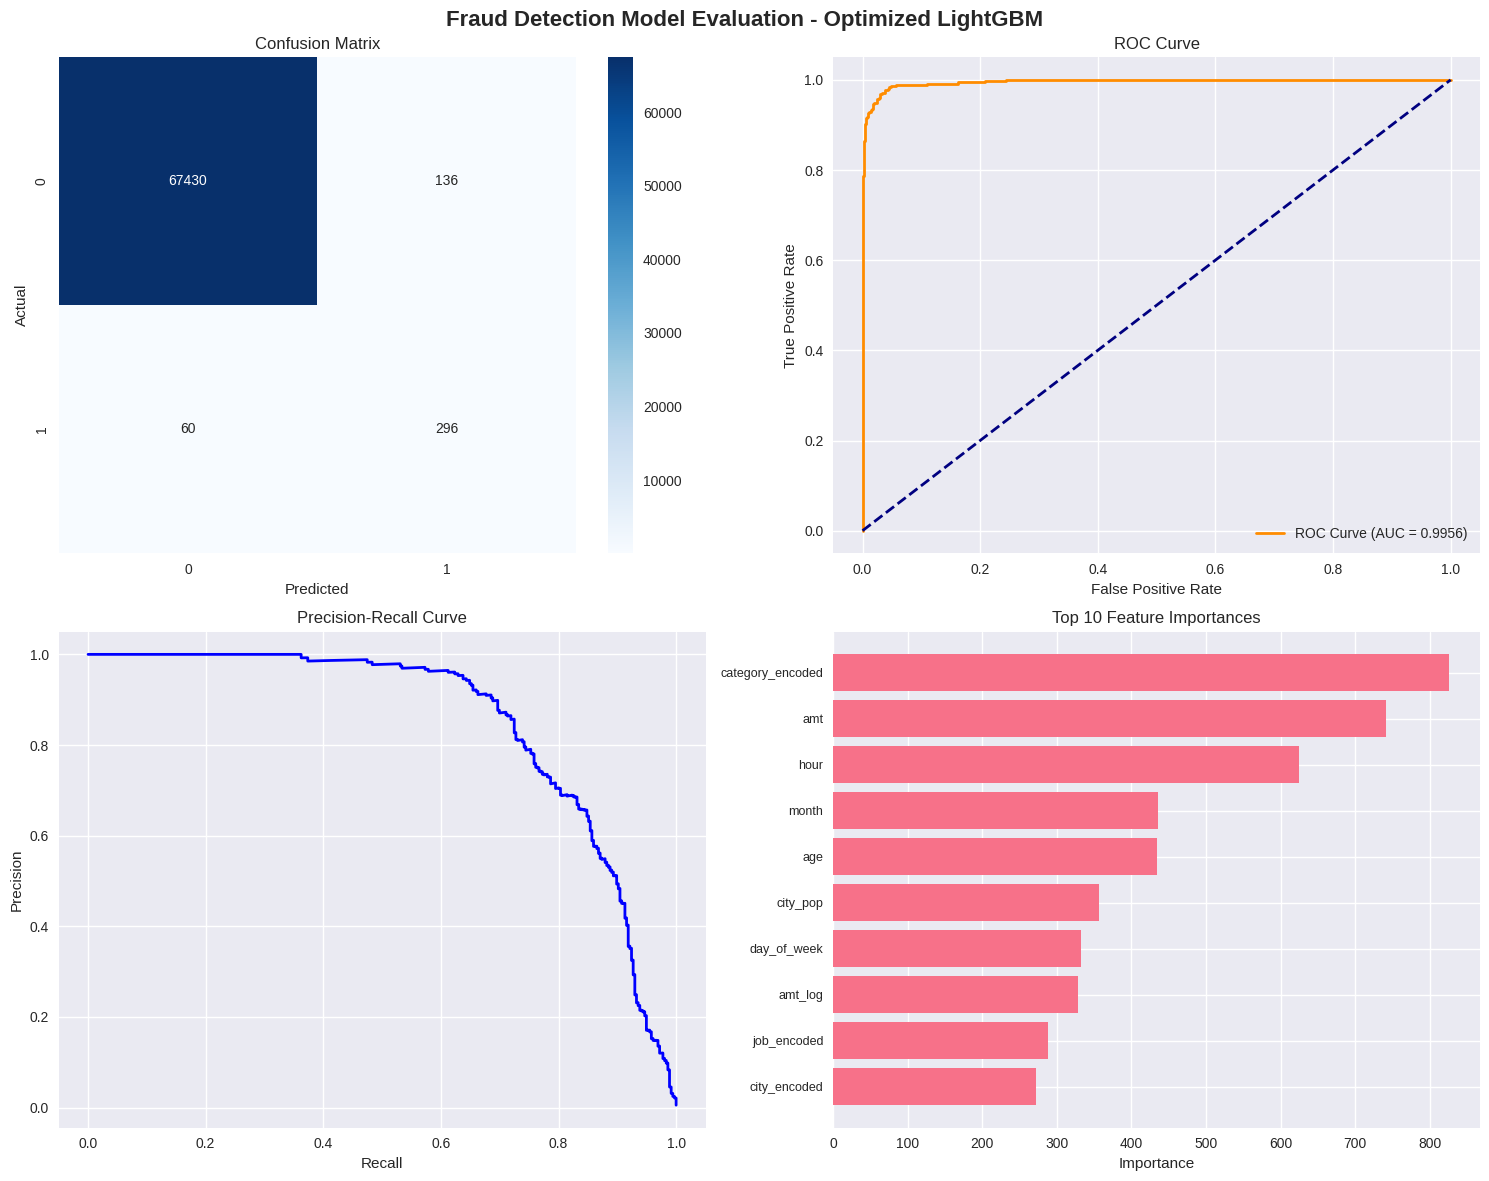


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67566
           1       0.69      0.83      0.75       356

    accuracy                           1.00     67922
   macro avg       0.84      0.91      0.87     67922
weighted avg       1.00      1.00      1.00     67922


📊 ADDITIONAL METRICS:
True Negatives: 67,430
False Positives: 136
False Negatives: 60
True Positives: 296
Specificity: 0.9980
Negative Predictive Value: 0.9991
Fall-out Rate: 0.0020

💼 BUSINESS IMPACT ANALYSIS:
Transactions Flagged as Fraud: 432
Actual Fraud Cases Caught: 296
Fraud Detection Rate: 83.15%
False Alarm Rate: 0.20%
Estimated Fraud Value Prevented: $153,347.38
✅ Model Evaluation Complete!


In [10]:
# Comprehensive Model Evaluation
print("📊 Performing Comprehensive Model Evaluation...")

# Final predictions
y_pred_final = final_model.predict(X_test_scaled)
y_pred_proba_final = final_model.predict_proba(X_test_scaled)[:, 1]

# Create evaluation visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'Fraud Detection Model Evaluation - {final_model_name}', fontsize=16, fontweight='bold')

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
auc_score = roc_auc_score(y_test, y_pred_proba_final)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend()

# 3. Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba_final)
axes[1, 0].plot(recall_vals, precision_vals, color='blue', lw=2)
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')

# 4. Feature Importance (if available)
if hasattr(final_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=True).tail(10)

    axes[1, 1].barh(feature_importance['feature'], feature_importance['importance'])
    axes[1, 1].set_title('Top 10 Feature Importances')
    axes[1, 1].set_xlabel('Importance')
    plt.setp(axes[1, 1].get_yticklabels(), fontsize=9)
else:
    axes[1, 1].text(0.5, 0.5, 'Feature importance\nnot available\nfor this model',
                    ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

# Detailed classification report
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_final))

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
fall_out = fp / (fp + tn)

print(f"\n📊 ADDITIONAL METRICS:")
print(f"True Negatives: {tn:,}")
print(f"False Positives: {fp:,}")
print(f"False Negatives: {fn:,}")
print(f"True Positives: {tp:,}")
print(f"Specificity: {specificity:.4f}")
print(f"Negative Predictive Value: {npv:.4f}")
print(f"Fall-out Rate: {fall_out:.4f}")

# Business impact analysis
print(f"\n💼 BUSINESS IMPACT ANALYSIS:")
print(f"Transactions Flagged as Fraud: {(y_pred_final == 1).sum():,}")
print(f"Actual Fraud Cases Caught: {tp:,}")
print(f"Fraud Detection Rate: {tp / (tp + fn):.2%}")
print(f"False Alarm Rate: {fp / (fp + tn):.2%}")

if tp + fn > 0:
    fraud_prevented_value = tp * df[df['is_fraud'] == 1]['amt'].mean()
    print(f"Estimated Fraud Value Prevented: ${fraud_prevented_value:,.2f}")

print("✅ Model Evaluation Complete!")

In [11]:
# Model Serialization and Deployment Preparation
print("💾 Preparing Model for Deployment...")

# Create model pipeline for easy deployment
class FraudDetectionPipeline:
    def __init__(self, model, scaler, label_encoders, feature_columns):
        self.model = model
        self.scaler = scaler
        self.label_encoders = label_encoders
        self.feature_columns = feature_columns

    def preprocess_transaction(self, transaction_data):
        """Preprocess a single transaction for prediction"""
        import pandas as pd
        import numpy as np
        from datetime import datetime

        # Create DataFrame
        df = pd.DataFrame([transaction_data])

        # Add default values for missing features
        defaults = {
            'trans_date_trans_time': datetime.now(),
            'lat': 40.7128,  # Default NYC coordinates
            'long': -74.0060,
            'city_pop': 100000,
            'merch_lat': 40.7589,
            'merch_long': -73.9851,
            'dob': '1980-01-01'
        }

        for key, value in defaults.items():
            if key not in df.columns:
                df[key] = value

        # Convert datetime
        df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
        df['dob'] = pd.to_datetime(df['dob'])

        # Extract time features
        df['hour'] = df['trans_date_trans_time'].dt.hour
        df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
        df['month'] = df['trans_date_trans_time'].dt.month

        # Calculate age
        df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days / 365.25

        # Calculate distance
        def haversine_distance(lat1, lon1, lat2, lon2):
            R = 6371
            lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
            dlat = lat2 - lat1
            dlon = lon2 - lon1
            a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
            c = 2 * np.arcsin(np.sqrt(a))
            return R * c

        df['distance_km'] = haversine_distance(
            df['lat'], df['long'], df['merch_lat'], df['merch_long']
        )

        # Amount features
        df['amt_log'] = np.log1p(df['amt'])
        df['amt_zscore'] = (df['amt'] - 67.62) / 134.25  # Use training stats

        # Encode categorical variables
        for col, encoder in self.label_encoders.items():
            if col in df.columns:
                try:
                    df[f'{col}_encoded'] = encoder.transform(df[col].astype(str))
                except ValueError:
                    # Handle unseen categories
                    df[f'{col}_encoded'] = 0
            else:
                df[f'{col}_encoded'] = 0

        # Select features
        df_features = df[self.feature_columns].fillna(0)

        return df_features

    def predict(self, transaction_data):
        """Make fraud prediction for a transaction"""
        processed_data = self.preprocess_transaction(transaction_data)
        scaled_data = self.scaler.transform(processed_data)

        prediction = self.model.predict(scaled_data)[0]
        probability = self.model.predict_proba(scaled_data)[0]

        return {
            'is_fraud': bool(prediction),
            'fraud_probability': float(probability[1]),
            'confidence': float(max(probability)),
            'risk_level': 'high' if probability[1] > 0.7 else 'medium' if probability[1] > 0.3 else 'low'
        }

# Create the pipeline
fraud_pipeline = FraudDetectionPipeline(
    model=final_model,
    scaler=scaler,
    label_encoders=label_encoders,
    feature_columns=feature_columns
)

# Save the complete pipeline
pipeline_filename = 'fraud_detection_pipeline.pkl'
with open(pipeline_filename, 'wb') as f:
    pickle.dump(fraud_pipeline, f)

print(f"✅ Model pipeline saved as '{pipeline_filename}'")

# Also save individual components
model_artifacts = {
    'model': final_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_columns': feature_columns,
    'model_name': final_model_name,
    'performance_metrics': {
        'accuracy': accuracy_score(y_test, y_pred_final),
        'precision': precision_score(y_test, y_pred_final),
        'recall': recall_score(y_test, y_pred_final),
        'f1_score': f1_score(y_test, y_pred_final),
        'auc_roc': roc_auc_score(y_test, y_pred_proba_final)
    }
}

artifacts_filename = 'fraud_model_artifacts.pkl'
with open(artifacts_filename, 'wb') as f:
    pickle.dump(model_artifacts, f)

print(f"✅ Model artifacts saved as '{artifacts_filename}'")

# Test the pipeline with sample data
print("\n🧪 Testing Deployment Pipeline...")
test_transaction = {
    'amt': 150.00,
    'merchant': 'Amazon',
    'category': 'online',
    'city': 'New York',
    'state': 'NY',
    'job': 'Engineer'
}

prediction_result = fraud_pipeline.predict(test_transaction)
print(f"Test Prediction Result: {prediction_result}")

print("\n🎉 Model Training and Deployment Preparation Complete!")
print(f"📦 Files created:")
print(f"  - {pipeline_filename}: Complete ML pipeline for deployment")
print(f"  - {artifacts_filename}: Individual model components and metrics")

💾 Preparing Model for Deployment...
✅ Model pipeline saved as 'fraud_detection_pipeline.pkl'
✅ Model artifacts saved as 'fraud_model_artifacts.pkl'

🧪 Testing Deployment Pipeline...
Test Prediction Result: {'is_fraud': False, 'fraud_probability': 0.0011419863002834565, 'confidence': 0.9988580136997165, 'risk_level': 'low'}

🎉 Model Training and Deployment Preparation Complete!
📦 Files created:
  - fraud_detection_pipeline.pkl: Complete ML pipeline for deployment
  - fraud_model_artifacts.pkl: Individual model components and metrics


## Data Dictionary

| transdatetrans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |